In [134]:
library(tidyverse) # metapackage of all tidyverse packages
library(plyr)
library(modeest)
library(ggplot2)
library(ggpubr)
library(cowplot)

In [135]:
path = "../input/hepatitis/hepatitis.csv"
columns = c("class", "age", "sex", "steroid", "antivirals", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices", "bilirubin", "alk_phosphate", "sgot", "albumin", "protime", "histology")
data = read.csv(path, header = F, sep=",", col.names = columns)

In [136]:
head(data)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
2,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
3,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
4,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
6,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [137]:
dataHip <- data

In [138]:
parsingNA <- function(col){
     if(is.factor(col)){
        col <- revalue(col, c("?" = NA))
     }
    if(nlevels(col) > 2){
        col <- as.numeric(levels(col))[col]
    }
    return (col)
}

In [139]:
# Recorremos cada columna para reemplazar los símbolos ? y dejarlos como NA
# Esto con el objeto de que Mice pueda reeconocer los datos perdidos y aplicar los métodos correspondientes.
for(i in names(dataHip)){
  dataHip[[i]] <- parsingNA(dataHip[[i]])
}

In [140]:
#Chequeamos la cantidad de datos perdidos
colSums(is.na(dataHip))

class             age             sex         steroid      antivirals 
              0               0               0               1               0 
        fatigue         malaise        anorexia       liver_big      liver_firm 
              1               1               1              10              11 
spleen_palpable         spiders         ascites         varices       bilirubin 
              5               5               5               5               6 
  alk_phosphate            sgot         albumin         protime       histology 
             29               4              16              67               0

In [141]:
# Aplicamos la imputación
# Poster
library(mice)
init = mice(dataHip, maxit=0) 
meth = init$method
# Descartamos estos atributos para la imputación
meth[c("age", "class", "sex", "antivirals", "histology")]=""
# Se aplica método de regresión logística para atributos con 2 niveles
meth[c("steroid", "fatigue", "malaise", "anorexia", "liver_big", "liver_firm", "spleen_palpable", "spiders", "ascites", "varices")]="logreg"
# Se aplica método de regresión logística politómica
meth[c("bilirubin", "alk_phosphate", "sgot", "albumin", "protime")]="norm"
predM = init$predictorMatrix
set.seed(103)
imputed = mice(dataHip, method=meth, predictorMatrix=predM, m=5)


 iter imp variable
  1   1  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   2  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   3  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   4  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  1   5  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  2   1  steroid  fatigue  malaise  anorexia  liver_big  liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  alk_phosphate  sgot  albumin  protime
  2   2 

In [142]:
dataImputed <- complete(imputed)
dataImputedNonConverted <- dataImputed

In [143]:
str(dataImputed)
datosDiscretos <- dataImputed

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 1 2 2 2 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : Factor w/ 2 levels "1","2": 2 1 1 2 2 2 1 2 1 2 ...
 $ malaise        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ anorexia       : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ liver_big      : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 2 2 2 2 ...
 $ liver_firm     : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 1 2 ...
 $ spleen_palpable: Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ spiders        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ ascites        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ varices        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ bilirubin      : num  1 0.9 0.

In [144]:
convertToInt <- function(col){
    col <- as.integer(levels(col))[col]
    return (col)
}

In [145]:
convertToNumeric <- function(col){
    col <- as.numeric(levels(col))[col]
    return (col)
}

In [146]:

# Convertimos los atributos que son categóricos a enteros
for(i in names(dataImputed)){
  if(is.factor(dataImputed[[i]])){
      dataImputed[[i]] <- convertToNumeric(dataImputed[[i]])
  }
}

In [147]:
colSums(is.na(dataImputed))

class             age             sex         steroid      antivirals 
              0               0               0               0               0 
        fatigue         malaise        anorexia       liver_big      liver_firm 
              0               0               0               0               0 
spleen_palpable         spiders         ascites         varices       bilirubin 
              0               0               0               0               0 
  alk_phosphate            sgot         albumin         protime       histology 
              0               0               0               0               0

In [148]:
datos <- dataImputed

In [149]:
summary(datos)

     class            age            sex           steroid       antivirals   
 Min.   :1.000   Min.   : 7.0   Min.   :1.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:32.0   1st Qu.:1.000   1st Qu.:1.00   1st Qu.:2.000  
 Median :2.000   Median :39.0   Median :1.000   Median :2.00   Median :2.000  
 Mean   :1.794   Mean   :41.2   Mean   :1.103   Mean   :1.51   Mean   :1.845  
 3rd Qu.:2.000   3rd Qu.:50.0   3rd Qu.:1.000   3rd Qu.:2.00   3rd Qu.:2.000  
 Max.   :2.000   Max.   :78.0   Max.   :2.000   Max.   :2.00   Max.   :2.000  
    fatigue         malaise         anorexia       liver_big    
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :2.000   Median :2.000   Median :2.000  
 Mean   :1.355   Mean   :1.606   Mean   :1.787   Mean   :1.813  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :2.000   Max.   :2.000   Max.   :2.000   Max.   :

In [150]:
str(datos)

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : num  1 1 2 2 2 2 1 2 2 2 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : num  2 1 1 2 2 2 1 2 1 2 ...
 $ malaise        : num  2 2 2 2 2 2 2 2 2 2 ...
 $ anorexia       : num  2 2 2 2 2 2 1 2 2 2 ...
 $ liver_big      : num  1 1 2 2 2 2 2 2 2 2 ...
 $ liver_firm     : num  2 2 2 2 2 2 2 2 1 2 ...
 $ spleen_palpable: num  2 2 2 2 2 2 1 2 2 2 ...
 $ spiders        : num  2 2 2 2 2 2 1 2 2 2 ...
 $ ascites        : num  2 2 2 2 2 2 2 2 2 2 ...
 $ varices        : num  2 2 2 2 2 2 2 2 2 2 ...
 $ bilirubin      : num  1 0.9 0.7 0.7 1 ...
 $ alk_phosphate  : num  85 135 96 46 61.6 ...
 $ sgot           : num  18 42 32 52 200 ...
 $ albumin        : num  4 3.5 4 4 4 ...
 $ protime        : num  46.2 77.4 40.5 80 70.9 ...
 $ histology      : int  1 1 1 1 

### Revisión balance de clase

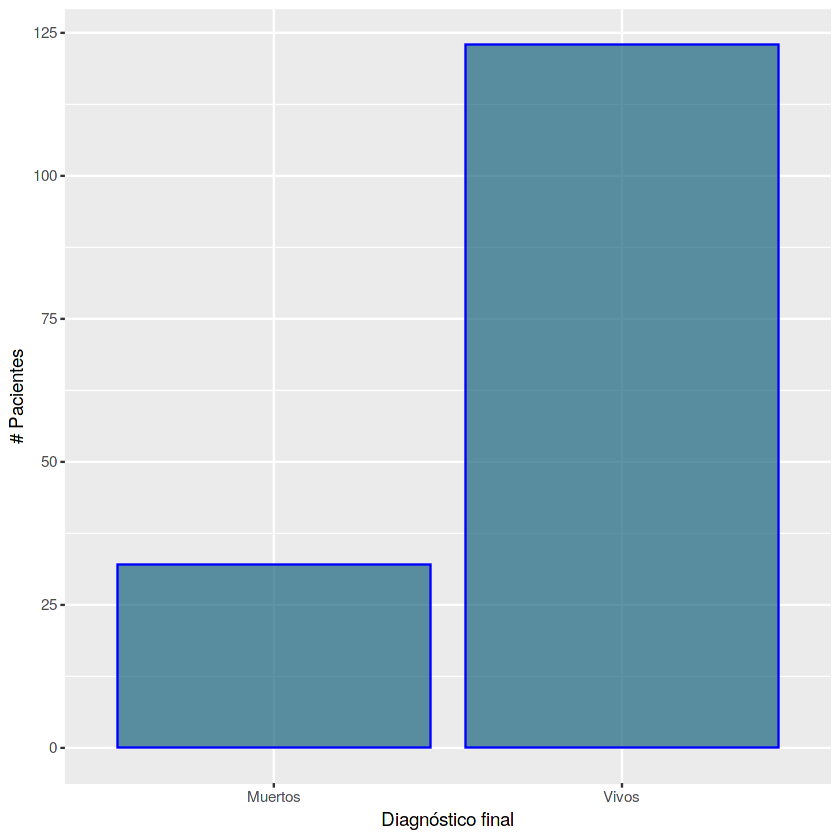

In [151]:
ggplot(datos, aes(x=as.factor(class) )) +
  geom_bar(color="blue", fill=rgb(0.1,0.4,0.5,0.7) ) +
  labs(x = "Diagnóstico final",
         y = "# Pacientes",
         color = "Legend")+
  scale_x_discrete(breaks=c("1","2"),
        labels=c("Muertos", "Vivos"))

In [152]:
# Número de pacientes fallecidos
f<-count(filter(datos, class == 1)$class)$freq
f
# Númerto de pacientes vivos
v<-count(filter(datos, class == 2)$class)$freq
v

[1] 32

[1] 123

In [153]:
# Notamos que la proporción es muy alta para los paciencientes vivos.
# Para poder aplicar las reglas de asociación es necesaria la condición de balance de clase, por lo que se ocuparán algunas técnicas
# para poder satisfacer lo señalado.

# https://www.analyticsvidhya.com/blog/2016/03/practical-guide-deal-imbalanced-classification-problems/
v/f


[1] 3.84375

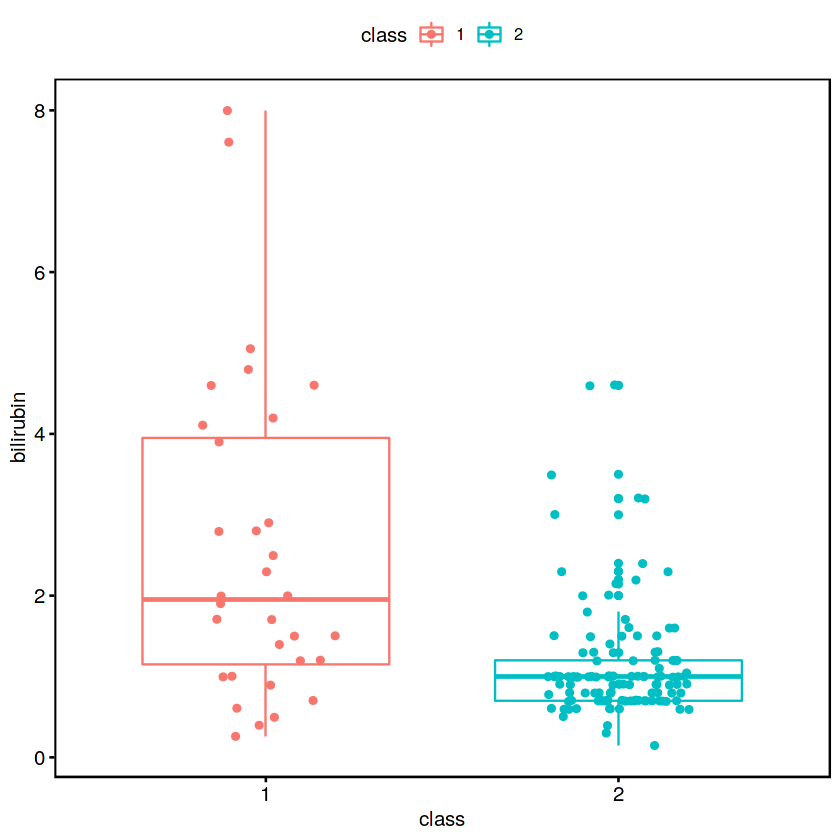

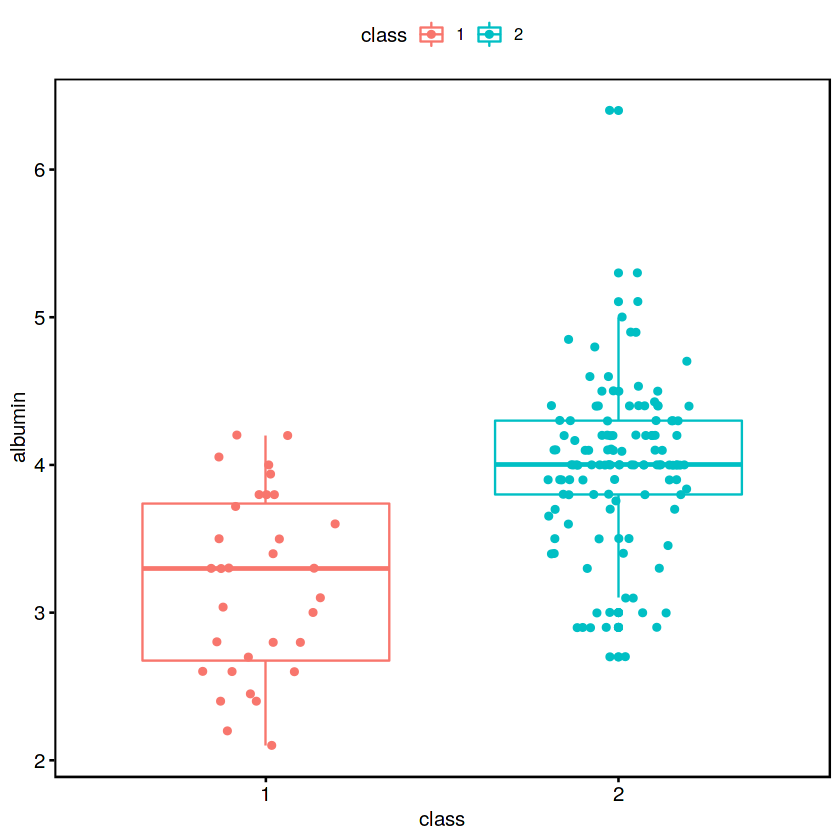

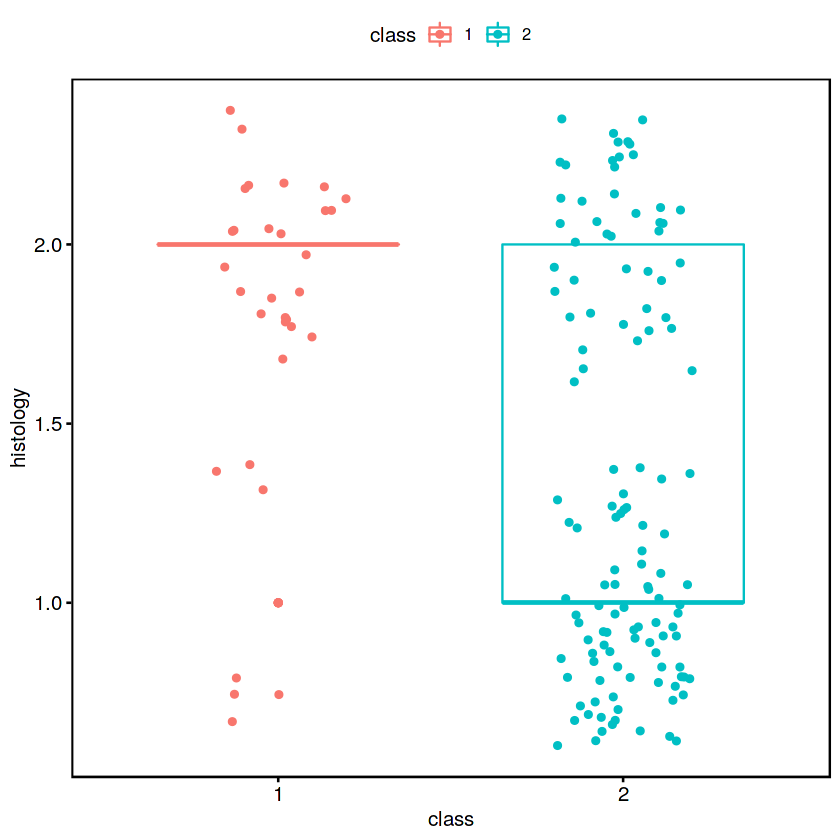

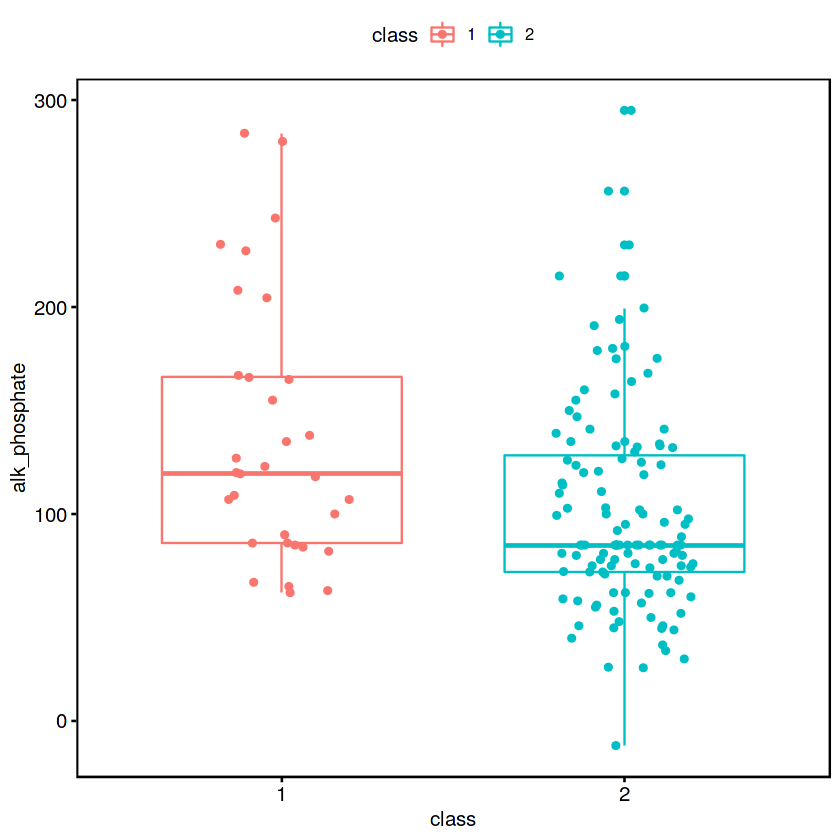

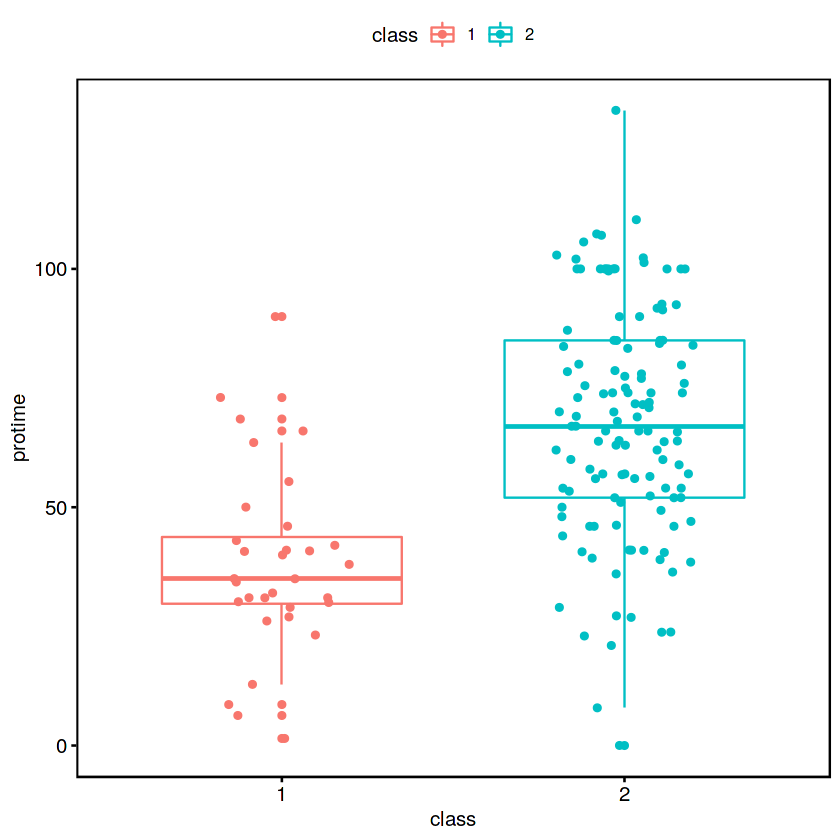

In [154]:
boxplot.bili =  ggboxplot(data = datos, x = "class", y = "bilirubin", color = "class", add = "jitter") + border() 
ydens = axis_canvas(boxplot.bili, axis = "y", coord_flip = TRUE) + geom_density(data = datos, aes(x = bilirubin, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
ggdraw(boxplot.bili)

boxplot.alb =  ggboxplot(data = datos, x = "class", y = "albumin", color = "class", add = "jitter") + border() 
ydens = axis_canvas(boxplot.alb, axis = "y", coord_flip = TRUE) + geom_density(data = datos, aes(x = albumin, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
ggdraw(boxplot.alb)

boxplot.hist =  ggboxplot(data = datos, x = "class", y = "histology", color = "class", add = "jitter") + border() 
ydens = axis_canvas(boxplot.hist, axis = "y", coord_flip = TRUE) + geom_density(data = datos, aes(x = histology, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
ggdraw(boxplot.hist)

boxplot.alk =  ggboxplot(data = datos, x = "class", y = "alk_phosphate", color = "class", add = "jitter") + border() 
ydens = axis_canvas(boxplot.alk, axis = "y", coord_flip = TRUE) + geom_density(data = datos, aes(x = alk_phosphate, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
ggdraw(boxplot.alk)

boxplot.alk =  ggboxplot(data = datos, x = "class", y = "protime", color = "class", add = "jitter") + border() 
ydens = axis_canvas(boxplot.alk, axis = "y", coord_flip = TRUE) + geom_density(data = datos, aes(x = protime, fill = class), alpha = 0.7, size = 0.2) + coord_flip()
ggdraw(boxplot.alk)

In [155]:
library("arulesViz")

In [156]:
# Dado que requerimos que los datos sean discretizados, vamos a utilizar lo que teníamos en un principio
str(data)

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : Factor w/ 3 levels "?","1","2": 2 2 3 1 3 3 2 3 3 3 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : Factor w/ 3 levels "?","1","2": 3 2 2 3 3 3 2 3 2 3 ...
 $ malaise        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 3 3 ...
 $ anorexia       : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 2 3 3 3 ...
 $ liver_big      : Factor w/ 3 levels "?","1","2": 2 2 3 3 3 3 3 3 3 3 ...
 $ liver_firm     : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 2 3 ...
 $ spleen_palpable: Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 2 3 3 3 ...
 $ spiders        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 2 3 3 3 ...
 $ ascites        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 3 3 ...
 $ varices        : Factor w/ 3 levels "?","1","2": 3 3 3 3 3 3 3 3 3

In [157]:
str(datosDiscretos)

'data.frame':	155 obs. of  20 variables:
 $ class          : int  2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : int  2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 1 2 2 2 ...
 $ antivirals     : int  2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : Factor w/ 2 levels "1","2": 2 1 1 2 2 2 1 2 1 2 ...
 $ malaise        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ anorexia       : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ liver_big      : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 2 2 2 2 ...
 $ liver_firm     : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 1 2 ...
 $ spleen_palpable: Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ spiders        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ ascites        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ varices        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ bilirubin      : num  1 0.9 0.

In [158]:
datos.rules = datosDiscretos

In [159]:
datos.rules$class = factor(datosDiscretos$class)
datos.rules$sex = factor(datosDiscretos$sex)
datos.rules$antivirals = factor(datosDiscretos$antivirals)
datos.rules$histology = factor(datosDiscretos$histology)

In [160]:
str(datos.rules)

'data.frame':	155 obs. of  20 variables:
 $ class          : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ age            : int  30 50 78 31 34 34 51 23 39 30 ...
 $ sex            : Factor w/ 2 levels "1","2": 2 1 1 1 1 1 1 1 1 1 ...
 $ steroid        : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 1 2 2 2 ...
 $ antivirals     : Factor w/ 2 levels "1","2": 2 2 2 1 2 2 2 2 2 2 ...
 $ fatigue        : Factor w/ 2 levels "1","2": 2 1 1 2 2 2 1 2 1 2 ...
 $ malaise        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ anorexia       : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ liver_big      : Factor w/ 2 levels "1","2": 1 1 2 2 2 2 2 2 2 2 ...
 $ liver_firm     : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 1 2 ...
 $ spleen_palpable: Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ spiders        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 1 2 2 2 ...
 $ ascites        : Factor w/ 2 levels "1","2": 2 2 2 2 2 2 2 2 2 2 ...
 $ varices        : Factor w/ 2 leve

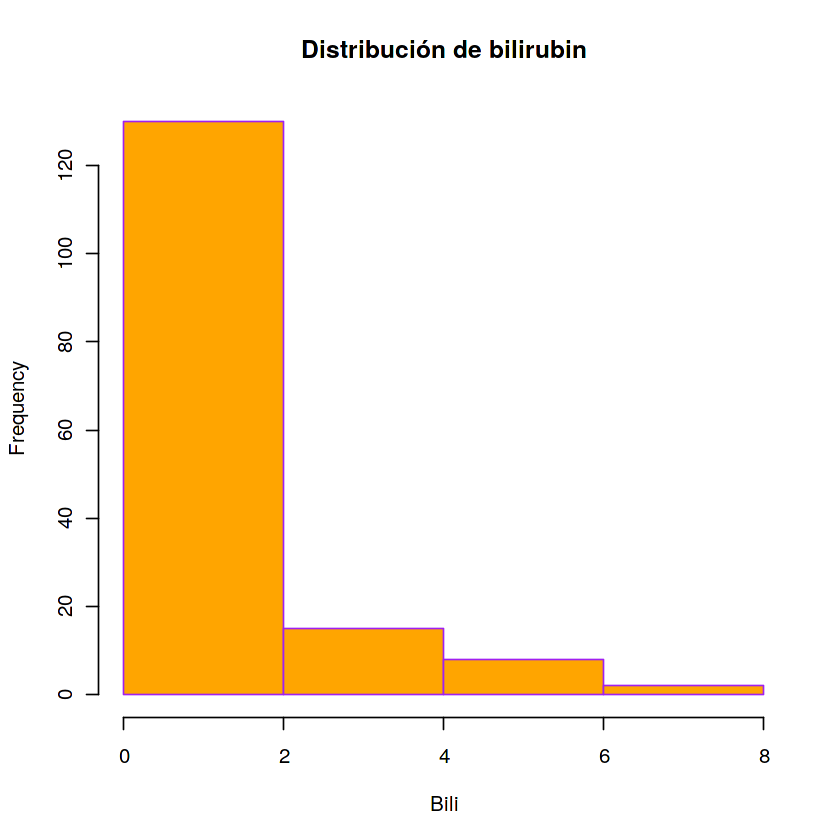

In [161]:

hist(datosDiscretos$bilirubin, breaks=4, main = "Distribución de bilirubin", 
     xlab = "Bili", border = "purple", 
     col = "orange",)

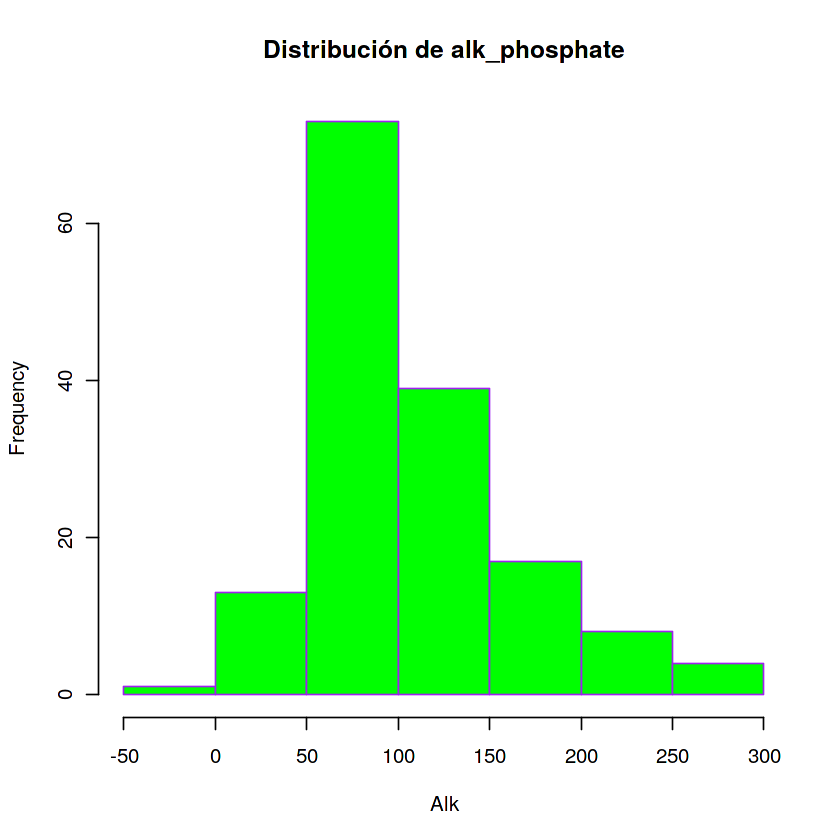

In [162]:
hist(datosDiscretos$alk_phosphate, breaks=6, main = "Distribución de alk_phosphate", 
     xlab = "Alk", border = "purple", 
     col = "green",)

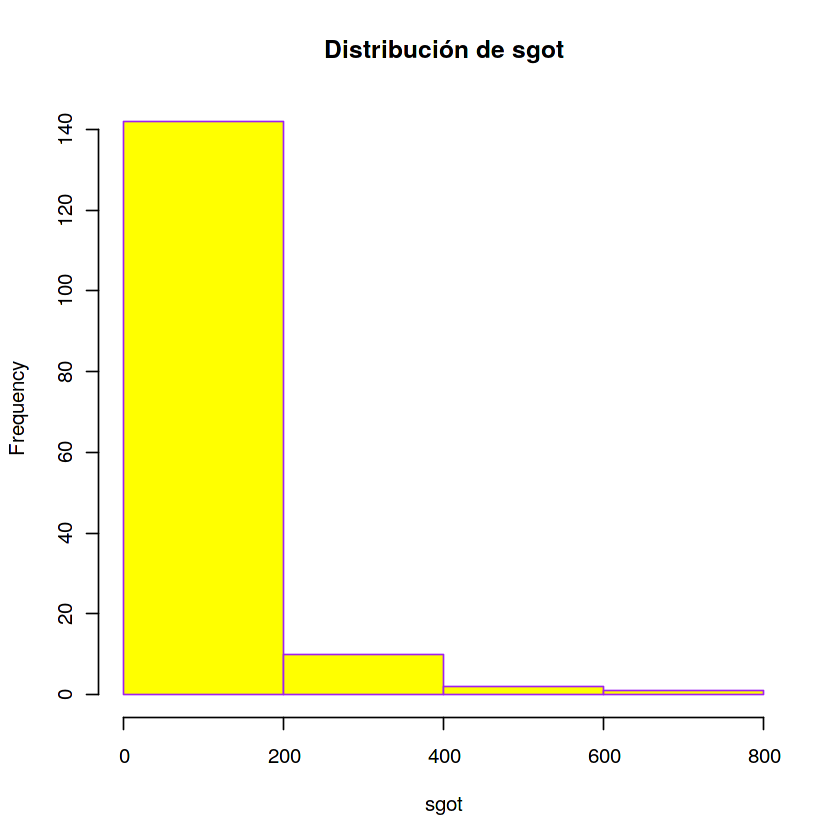

In [163]:
hist(datosDiscretos$sgot, breaks=3, main = "Distribución de sgot", 
     xlab = "sgot", border = "purple", 
     col = "yellow",)

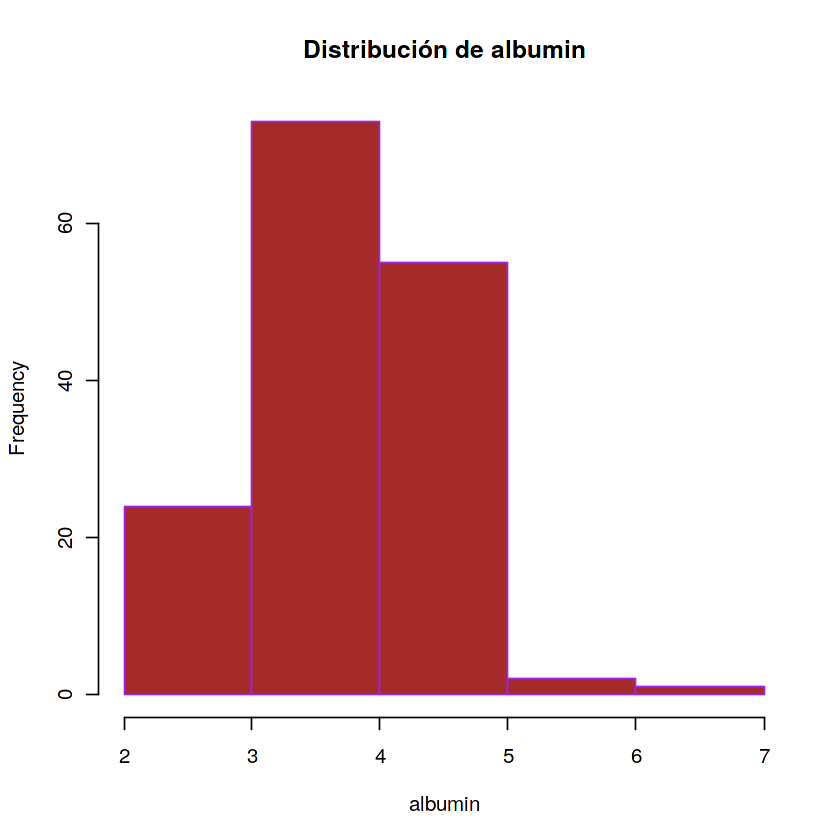

In [164]:
hist(datosDiscretos$albumin, breaks=5, main = "Distribución de albumin", 
     xlab = "albumin", border = "purple", 
     col = "brown",)

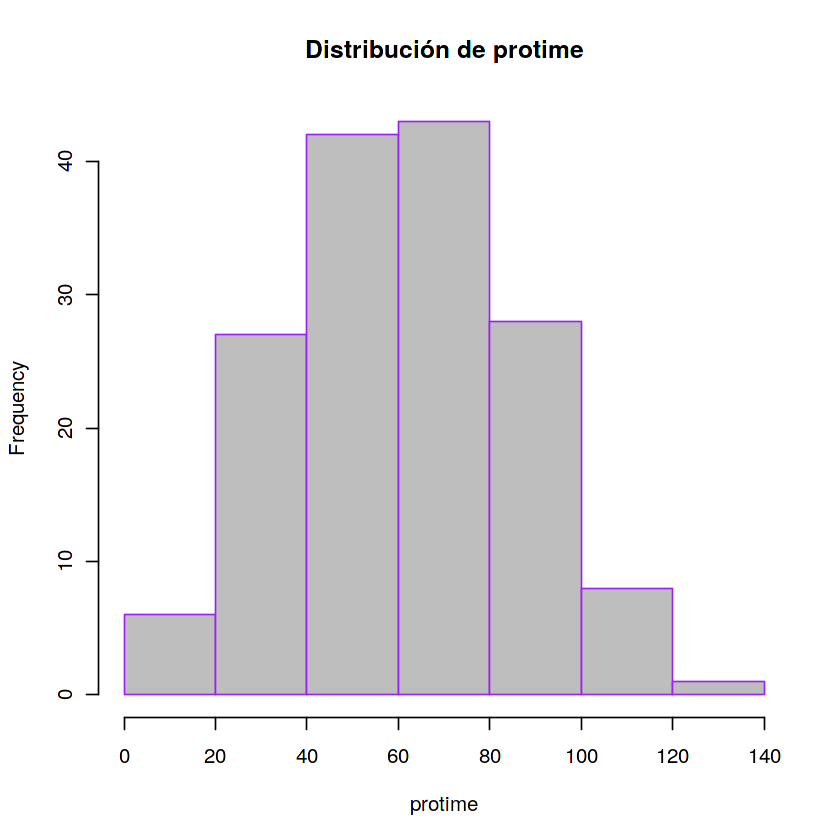

In [165]:
hist(datosDiscretos$protime, breaks=5, main = "Distribución de protime", 
     xlab = "protime", border = "purple", 
     col = "gray",)

In [166]:
# Creamos una función para obtener los cortes de forma dinámica.
getQuantiles <- function(rows, percent){
    return (quantile(rows, probs = seq(0, 1,percent), na.rm = FALSE))
}

In [167]:
# Age
agePercentile = getQuantiles(datosDiscretos$age, 0.3333333)
age = c(-Inf, agePercentile[[2]], agePercentile[[3]], Inf)
age.names = c("Jóven", "Adulto", "Adulto Mayor")

#Bilirubin
biliPercentile = getQuantiles(datosDiscretos$bilirubin, 0.3333333)
bili = c(-Inf, biliPercentile[[2]], biliPercentile[[3]], Inf)
bili.names = c("Bajo", "Medio", "Alto")

#alk_phosphate
alkPercentile = getQuantiles(datosDiscretos$alk_phosphate, 0.3333333)
alk = c(-Inf, alkPercentile[[2]], alkPercentile[[3]], Inf)
alk.names = c("Bajo", "Medio", "Alto")

#sgot
sgotPercentile = getQuantiles(datosDiscretos$sgot, 0.3333333)
sgot = c(-Inf, sgotPercentile[[2]], sgotPercentile[[3]], Inf)
sgot.names = c("Bajo", "Medio", "Alto")

#albumin
albPercentile = getQuantiles(datosDiscretos$albumin, 0.3333333)
alb = c(-Inf, albPercentile[[2]], albPercentile[[3]], Inf)
alb.names = c("Bajo", "Medio", "Alto")

#protime
proPercentile = getQuantiles(datosDiscretos$protime, 0.3333333)
pro = c(-Inf, proPercentile[[2]], proPercentile[[3]], Inf)
pro.names = c("Bajo", "Medio", "Alto")


In [168]:
datos.rules$age = cut(datosDiscretos$age, breaks = age, labels = age.names)
datos.rules$bilirubin = cut(datosDiscretos$bilirubin, breaks = bili, labels = bili.names)
datos.rules$alk_phosphate = cut(datosDiscretos$alk_phosphate, breaks = alk, labels = alk.names)
datos.rules$sgot = cut(datosDiscretos$sgot, breaks = sgot, labels = sgot.names)
datos.rules$albumin = cut(datosDiscretos$albumin, breaks = alb, labels = alb.names)
datos.rules$protime = cut(datosDiscretos$protime, breaks = pro, labels = pro.names)

In [169]:
head(datos.rules)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,Jóven,2,1,2,2,2,2,1,2,2,2,2,2,Medio,Medio,Bajo,Medio,Bajo,1
2,2,Adulto Mayor,1,1,2,1,2,2,1,2,2,2,2,2,Bajo,Alto,Bajo,Bajo,Alto,1
3,2,Adulto Mayor,1,2,2,1,2,2,2,2,2,2,2,2,Bajo,Medio,Bajo,Medio,Bajo,1
4,2,Jóven,1,2,1,2,2,2,2,2,2,2,2,2,Bajo,Bajo,Medio,Medio,Alto,1
5,2,Jóven,1,2,2,2,2,2,2,2,2,2,2,2,Medio,Bajo,Alto,Medio,Medio,1
6,2,Jóven,1,2,2,2,2,2,2,2,2,2,2,2,Bajo,Medio,Bajo,Medio,Alto,1


In [170]:
# Vamos a buscar algunas reglas sencillas, sólo con algunos atributos del dataset, dado que tenemos una dimensionalidad muy amplia
datos.rules.reduced = datos.rules[, c(1,2,15, 16,17,18,19,20)]
head(datos.rules.reduced)

,class,age,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,Jóven,Medio,Medio,Bajo,Medio,Bajo,1
2,2,Adulto Mayor,Bajo,Alto,Bajo,Bajo,Alto,1
3,2,Adulto Mayor,Bajo,Medio,Bajo,Medio,Bajo,1
4,2,Jóven,Bajo,Bajo,Medio,Medio,Alto,1
5,2,Jóven,Medio,Bajo,Alto,Medio,Medio,1
6,2,Jóven,Bajo,Medio,Bajo,Medio,Alto,1


### Apliquemos las reglas - DATOS DESBALANCEADOS
Notamos que **no existen reglas donde el paciente tenga como resultado la "muerte"**

In [171]:
rules = apriori(
    data = datos.rules.reduced, 
    parameter=list(support = 0.2, minlen = 2, maxlen = 8, target="rules"),
    appearance=list(rhs = c("class=1", "class=2"))
)

inspect(sort(x = rules, decreasing = TRUE, by = "confidence"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.2      2
 maxlen target   ext
      8  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 31 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[22 item(s), 155 transaction(s)] done [0.00s].
sorting and recoding items ... [22 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [17 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                                 rhs       support   confidence
[1]  {protime=Alto,histology=1}       => {class=2} 0.2129032 1.0000000 
[2]  {protime=Alto}                   => {class=2} 0.3290323 0.9807692 
[3]  {bilirubin=Bajo,histology=1}     => {class=2} 0.2645161 0.9761905 
[

### Aplicando Balance

1. ### Oversampling
Trabajaremos sobre la clase que tiene menor data

In [172]:
library(ROSE)

In [173]:
datos.over <- ovun.sample(class ~ ., data = datos.rules, method = "over",N = 246)$data
table(datos.over$class)


  2   1 
123 123 

In [174]:
datos.over.reduced = datos.over[, c(1,2, 9,12,15, 16,17,18,19,20)]
head(datos.over.reduced)

,class,age,liver_big,spiders,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,Jóven,1,2,Medio,Medio,Bajo,Medio,Bajo,1
2,2,Adulto Mayor,1,2,Bajo,Alto,Bajo,Bajo,Alto,1
3,2,Adulto Mayor,2,2,Bajo,Medio,Bajo,Medio,Bajo,1
4,2,Jóven,2,2,Bajo,Bajo,Medio,Medio,Alto,1
5,2,Jóven,2,2,Medio,Bajo,Alto,Medio,Medio,1
6,2,Jóven,2,2,Bajo,Medio,Bajo,Medio,Alto,1


In [175]:
rulesOver = apriori(
    data = datos.over.reduced, 
    parameter=list(support = 0.2, minlen = 2, maxlen = 8, target="rules"),
    appearance=list(rhs = c("class=1", "class=2"))
)

inspect(sort(x = rulesOver, decreasing = TRUE, by = "confidence"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.2      2
 maxlen target   ext
      8  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 49 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[26 item(s), 246 transaction(s)] done [0.00s].
sorting and recoding items ... [25 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [48 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                     rhs         support confidence     lift count
[1]  {protime=Alto}       => {class=2} 0.2073171  1.0000000 2.000000    51
[2]  {liver_big=2,                                                        
      spiders=1,                                          

Notamos que bajo esta imputación, practicamente todas las reglas se asocian a la muerte del paciente.
Por otra parte, podemos ver que hay dos reglas que se asocia con la sobrevivencia, para protime alto, y otras con la histologia 1

In [176]:
# veamos la proporción de esta regla vs los sobrevivientes
hist = datos.over[datos.over$histology == 1 & datos.over$spiders == 2,]
muertos = nrow(hist[hist$class == 1,])
vivos = nrow(hist[hist$class == 2,])
muertos/vivos
# % de muertos que pertenecen a esta asociación
muertos/nrow(datos.over)*100
# % de vivos que pertenecen a esta asociación 
vivos/nrow(datos.over)*100

[1] 0.1076923

[1] 2.845528

[1] 26.42276

In [177]:
# para protime
pro = datos.over[datos.over$protime == "Alto",]
muertos = nrow(pro[pro$class == 1,])
vivos = nrow(pro[pro$class == 2,])
muertos/vivos
# % de muertos que pertenecen a esta asociación
muertos/nrow(datos.over)*100
# % de vivos que pertenecen a esta asociación 
vivos/nrow(datos.over)*100

[1] 0

[1] 0

[1] 20.73171

Veamos la primera regla obtenida, para los paciente que fallecieron con la regla:
1. albumin=Bajo
2. protime=Bajo,                                                     
3. histology=2

In [178]:
rule1 = datos.over[datos.over$albumin == "Bajo" & datos.over$protime == "Bajo" & datos.over$histology == 2,]
muertos = nrow(rule1[rule1$class == 1,])
vivos = nrow(rule1[rule1$class == 2,])
muertos/vivos
# % de muertos que pertenecen a esta asociación
muertos/nrow(datos.over)*100
# % de vivos que pertenecen a esta asociación 
vivos/nrow(datos.over)*100

[1] 13.16667

[1] 32.11382

[1] 2.439024

2. ### Undersampling
Trabajaremos sobre la clase que tiene **MAYOR** data

In [179]:
datos.under <- ovun.sample(class ~ ., data = datos.rules, method = "under",N = 64)$data
table(datos.under$class)


 2  1 
32 32 

In [180]:
datos.under.reduced = datos.under[, c(1,2, 9,12,15, 16,17,18,19,20)]
head(datos.under.reduced)

,class,age,liver_big,spiders,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,Jóven,2,2,Medio,Bajo,Alto,Alto,Medio,2
2,2,Adulto Mayor,1,1,Bajo,Bajo,Bajo,Medio,Bajo,2
3,2,Jóven,2,2,Alto,Bajo,Alto,Medio,Bajo,1
4,2,Jóven,2,1,Bajo,Alto,Alto,Medio,Alto,2
5,2,Adulto Mayor,2,2,Bajo,Bajo,Medio,Medio,Bajo,1
6,2,Adulto,2,2,Bajo,Alto,Medio,Alto,Alto,1


In [181]:
rulesUnder = apriori(
    data = datos.under.reduced, 
    parameter=list(support = 0.2, minlen = 2, maxlen = 8, target="rules"),
    appearance=list(rhs = c("class=1", "class=2"))
)

inspect(sort(x = rulesUnder, decreasing = TRUE, by = "confidence"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.2      2
 maxlen target   ext
      8  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 12 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[26 item(s), 64 transaction(s)] done [0.00s].
sorting and recoding items ... [25 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [47 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                   rhs        support confidence     lift count
[1]  {spiders=2,                                                       
      albumin=Alto}     => {class=2} 0.203125  1.0000000 2.000000    13
[2]  {liver_big=2,                                                    

2. ### Balanceo dual
Trabajaremos sobre ambas clases de tal forma de alcanzar un equilibrio

In [182]:
datos.both <- ovun.sample(class ~ ., data = datos.rules, method = "both",p = 0.5)$data
table(datos.both$class)


 2  1 
78 77 

In [183]:
datos.both.reduced = datos.both[, c(1,2,9,12,15, 16,17,18,19,20)]
head(datos.both.reduced)

,class,age,liver_big,spiders,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,Adulto,2,2,Medio,Bajo,Bajo,Medio,Medio,1
2,2,Adulto Mayor,2,2,Bajo,Bajo,Medio,Medio,Bajo,1
3,2,Adulto,2,2,Bajo,Bajo,Medio,Alto,Alto,1
4,2,Jóven,2,2,Bajo,Bajo,Bajo,Alto,Medio,1
5,2,Adulto,2,2,Medio,Medio,Bajo,Medio,Alto,1
6,2,Jóven,2,2,Alto,Alto,Alto,Bajo,Medio,2


In [184]:
rulesBoth = apriori(
    data = datos.both.reduced, 
    parameter=list(support = 0.2, minlen = 2, maxlen = 8, target="rules"),
    appearance=list(rhs = c("class=1", "class=2"))
)

inspect(sort(x = rulesBoth, decreasing = TRUE, by = "confidence"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.2      2
 maxlen target   ext
      8  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 31 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[26 item(s), 155 transaction(s)] done [0.00s].
sorting and recoding items ... [25 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [47 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                      rhs         support confidence     lift count
[1]  {protime=Alto}        => {class=2} 0.2322581  1.0000000 1.987179    36
[2]  {alk_phosphate=Medio,                                                 
      protime=Bajo}        => {class=1} 0.2000000  1.0000


spiders=1,                                                           
      albumin=Bajo,                                                        
      protime=Bajo,                                                        
      histology=2

In [185]:
library(ROSE)

### Balance con método - Synthetic Data Generation

In [186]:
datos.syn <- ROSE(class ~ ., data = datos.rules, seed = 1)$data
table(datos.syn$class)


 2  1 
78 77 

In [187]:
datos.syn.reduced = datos.syn[, c(1,2,9,12,15, 16,17,18,19,20)]
head(datos.syn.reduced)

,class,age,liver_big,spiders,bilirubin,alk_phosphate,sgot,albumin,protime,histology
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,Adulto Mayor,2,1,Alto,Alto,Alto,Medio,Medio,1
2,2,Jóven,2,2,Medio,Medio,Bajo,Medio,Alto,1
3,2,Jóven,2,2,Medio,Bajo,Medio,Medio,Medio,1
4,2,Adulto Mayor,1,2,Alto,Bajo,Bajo,Medio,Alto,1
5,2,Adulto,1,1,Alto,Alto,Medio,Bajo,Bajo,2
6,2,Adulto Mayor,2,1,Medio,Medio,Medio,Medio,Medio,2


In [188]:
rulesSyn = apriori(
    data = datos.syn.reduced, 
    parameter=list(support = 0.2, minlen = 2, maxlen = 8, target="rules"),
    appearance=list(rhs = c("class=1", "class=2"))
)

inspect(sort(x = rulesSyn, decreasing = TRUE, by = "confidence"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.2      2
 maxlen target   ext
      8  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 31 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[26 item(s), 155 transaction(s)] done [0.00s].
sorting and recoding items ... [25 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [27 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                     rhs         support confidence     lift count
[1]  {liver_big=2,                                                        
      albumin=Bajo,                                                       
      protime=Bajo,                                         

Veamos esta regla
albumin=Bajo,protime=Bajo,histology=2

In [189]:
# ESTA REGLA VUELVE APARECER!!

In [190]:
rule1 = datos.syn[datos.syn$albumin == "Bajo" & datos.over$protime == "Bajo" & datos.syn$histology == 2,]
muertos = nrow(rule1[rule1$class == 1,])
vivos = nrow(rule1[rule1$class == 2,])
muertos/vivos
# % de muertos que pertenecen a esta asociación
muertos/nrow(datos.syn)*100
# % de vivos que pertenecen a esta asociación 
vivos/nrow(datos.syn)*100

Warning message in datos.syn$albumin == "Bajo" & datos.over$protime == "Bajo":
“longer object length is not a multiple of shorter object length”
Warning message in datos.syn$albumin == "Bajo" & datos.over$protime == "Bajo" & :
“longer object length is not a multiple of shorter object length”


[1] 2.666667

[1] 20.64516

[1] 7.741935

In [191]:
# Esta regla de asociación para el dataset original, nos arroja porcentajes bajo de indicación que el paciente puede fallecer

rule1_ = datos.rules[datos.rules$albumin == "Bajo" & datos.rules$protime == "Bajo" & datos.rules$histology == 2,]
muertos = nrow(rule1_[rule1_$class == 1,])
vivos = nrow(rule1_[rule1_$class == 2,])
muertos/vivos
# % de muertos que pertenecen a esta asociación
muertos/nrow(datos.rules)*100
# % de vivos que pertenecen a esta asociación 
vivos/nrow(datos.rules)*100

[1] 3

[1] 11.6129

[1] 3.870968

In [192]:
totalMuertos_original =  datos.rules[datos.rules$class == 1,]
totalMuertos_balanceado = datos.syn[datos.syn$class == 1,]
muertos/nrow(totalMuertos_original)
muertos/nrow(totalMuertos_balanceado)

[1] 0.5625

[1] 0.2337662

Notar que las primeras reglas, se asocia con la histología en 1